In [2]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Wczytywanie danych
data = pd.read_csv("weatherAUS.csv")

# Podstawowe informacje o danych
print("Pierwsze 5 wierszy danych:")
display(data.head())

print("\nPodstawowe informacje:")
data.info()

print("\nPodstawowe statystyki opisowe:")
display(data.describe())

Pierwsze 5 wierszy danych:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No



Podstawowe informacje:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
# Analiza brakujących danych
print("Brakujące wartości w kolumnach:")
display(data.isnull().sum())


Brakujące wartości w kolumnach:


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

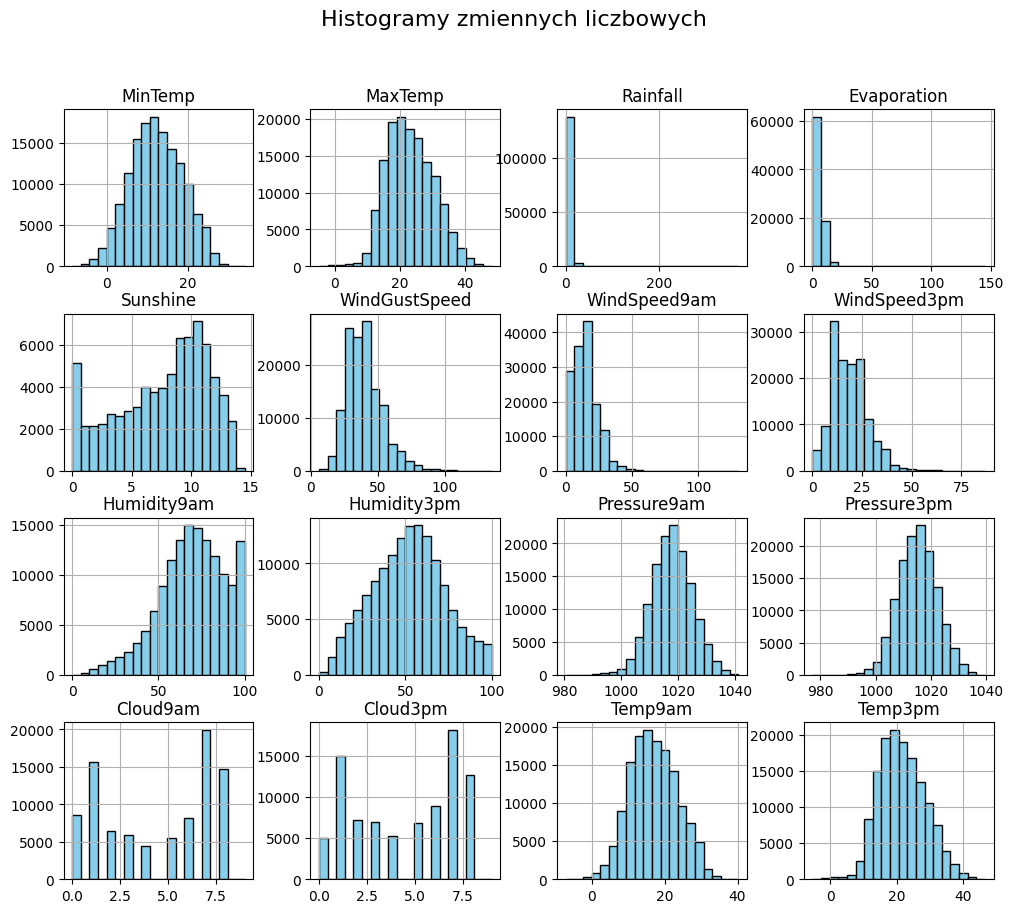

In [5]:
# Rozkład zmiennych liczbowych
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogramy zmiennych liczbowych", fontsize=16)
plt.show()

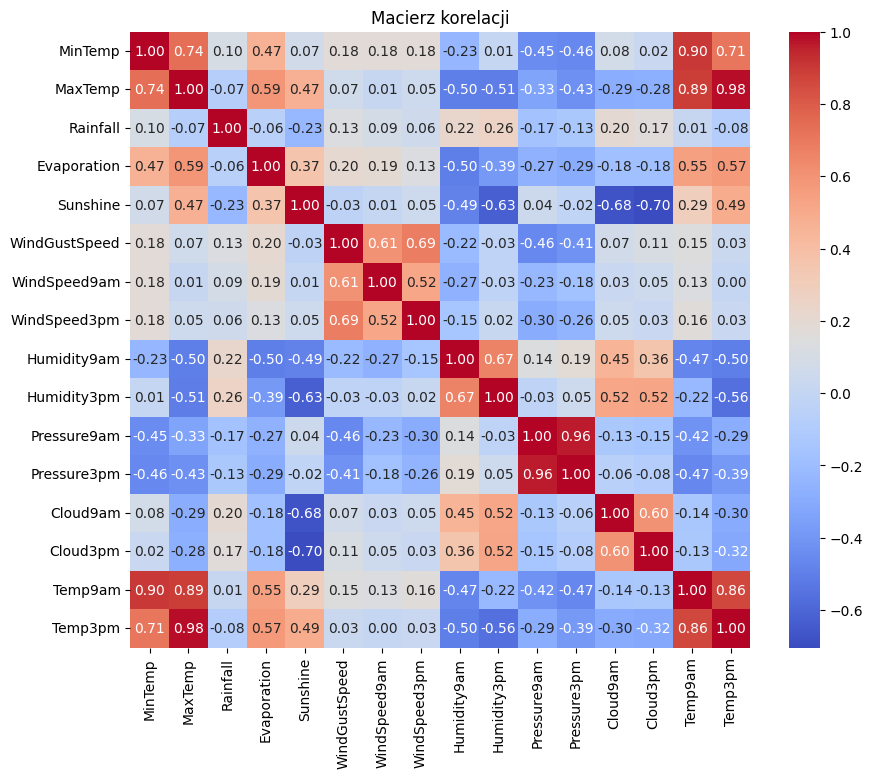

In [6]:
# Korelacja między zmiennymi liczbowymi
correlation = data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

C:\Users\bartek\AppData\Local\Temp\ipykernel_59248\3172505083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)


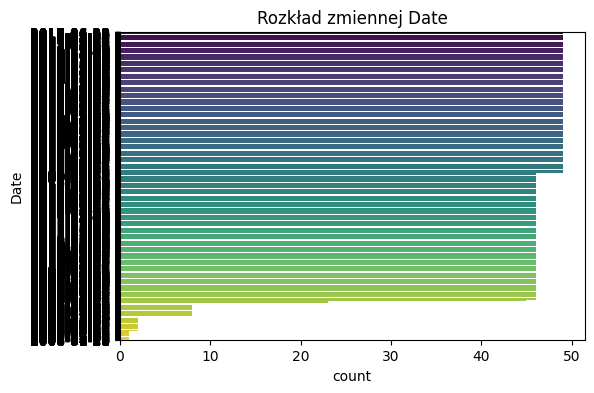

C:\Users\bartek\AppData\Local\Temp\ipykernel_59248\3172505083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)


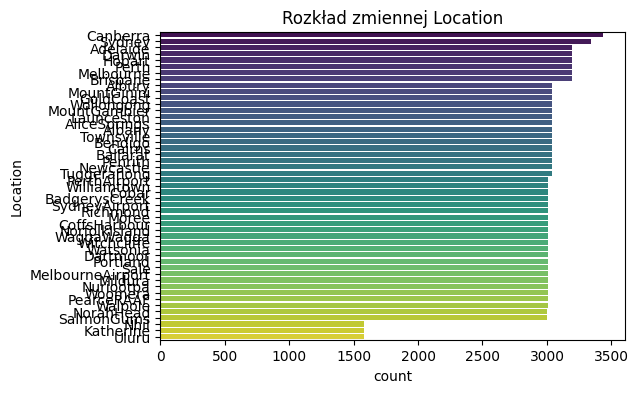

C:\Users\bartek\AppData\Local\Temp\ipykernel_59248\3172505083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)


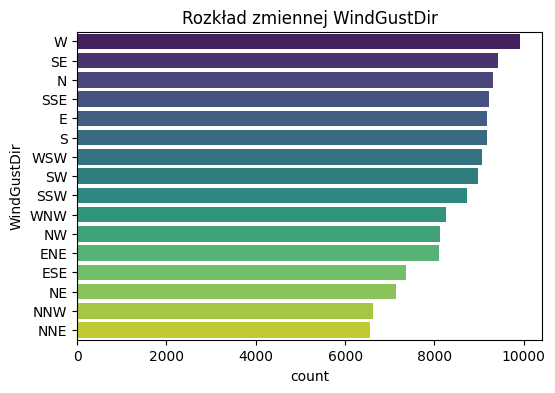

C:\Users\bartek\AppData\Local\Temp\ipykernel_59248\3172505083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)


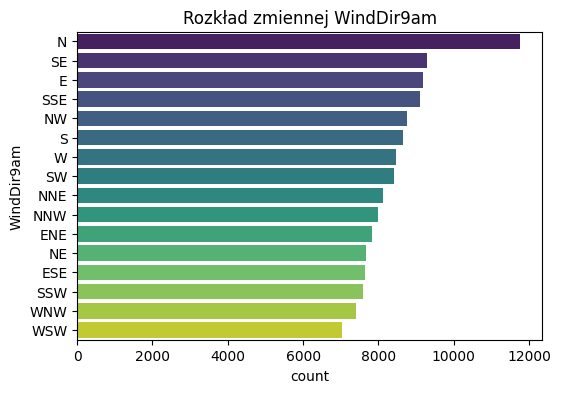

C:\Users\bartek\AppData\Local\Temp\ipykernel_59248\3172505083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)


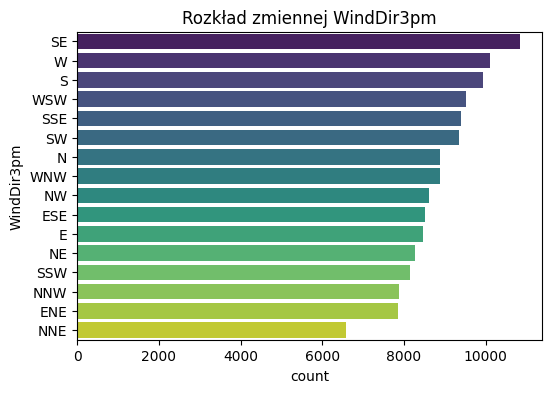

C:\Users\bartek\AppData\Local\Temp\ipykernel_59248\3172505083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)


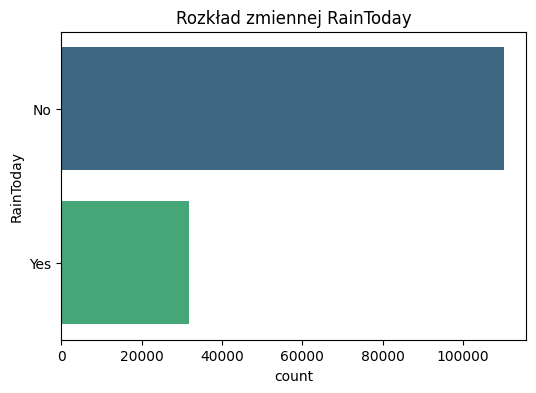

C:\Users\bartek\AppData\Local\Temp\ipykernel_59248\3172505083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)


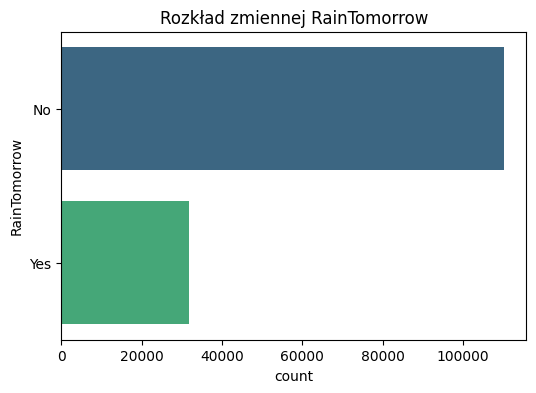

In [7]:
# Rozkład zmiennych kategorycznych
categorical_cols = data.select_dtypes(include=['category', 'object']).columns
for column in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)
    plt.title(f"Rozkład zmiennej {column}")
    plt.show()

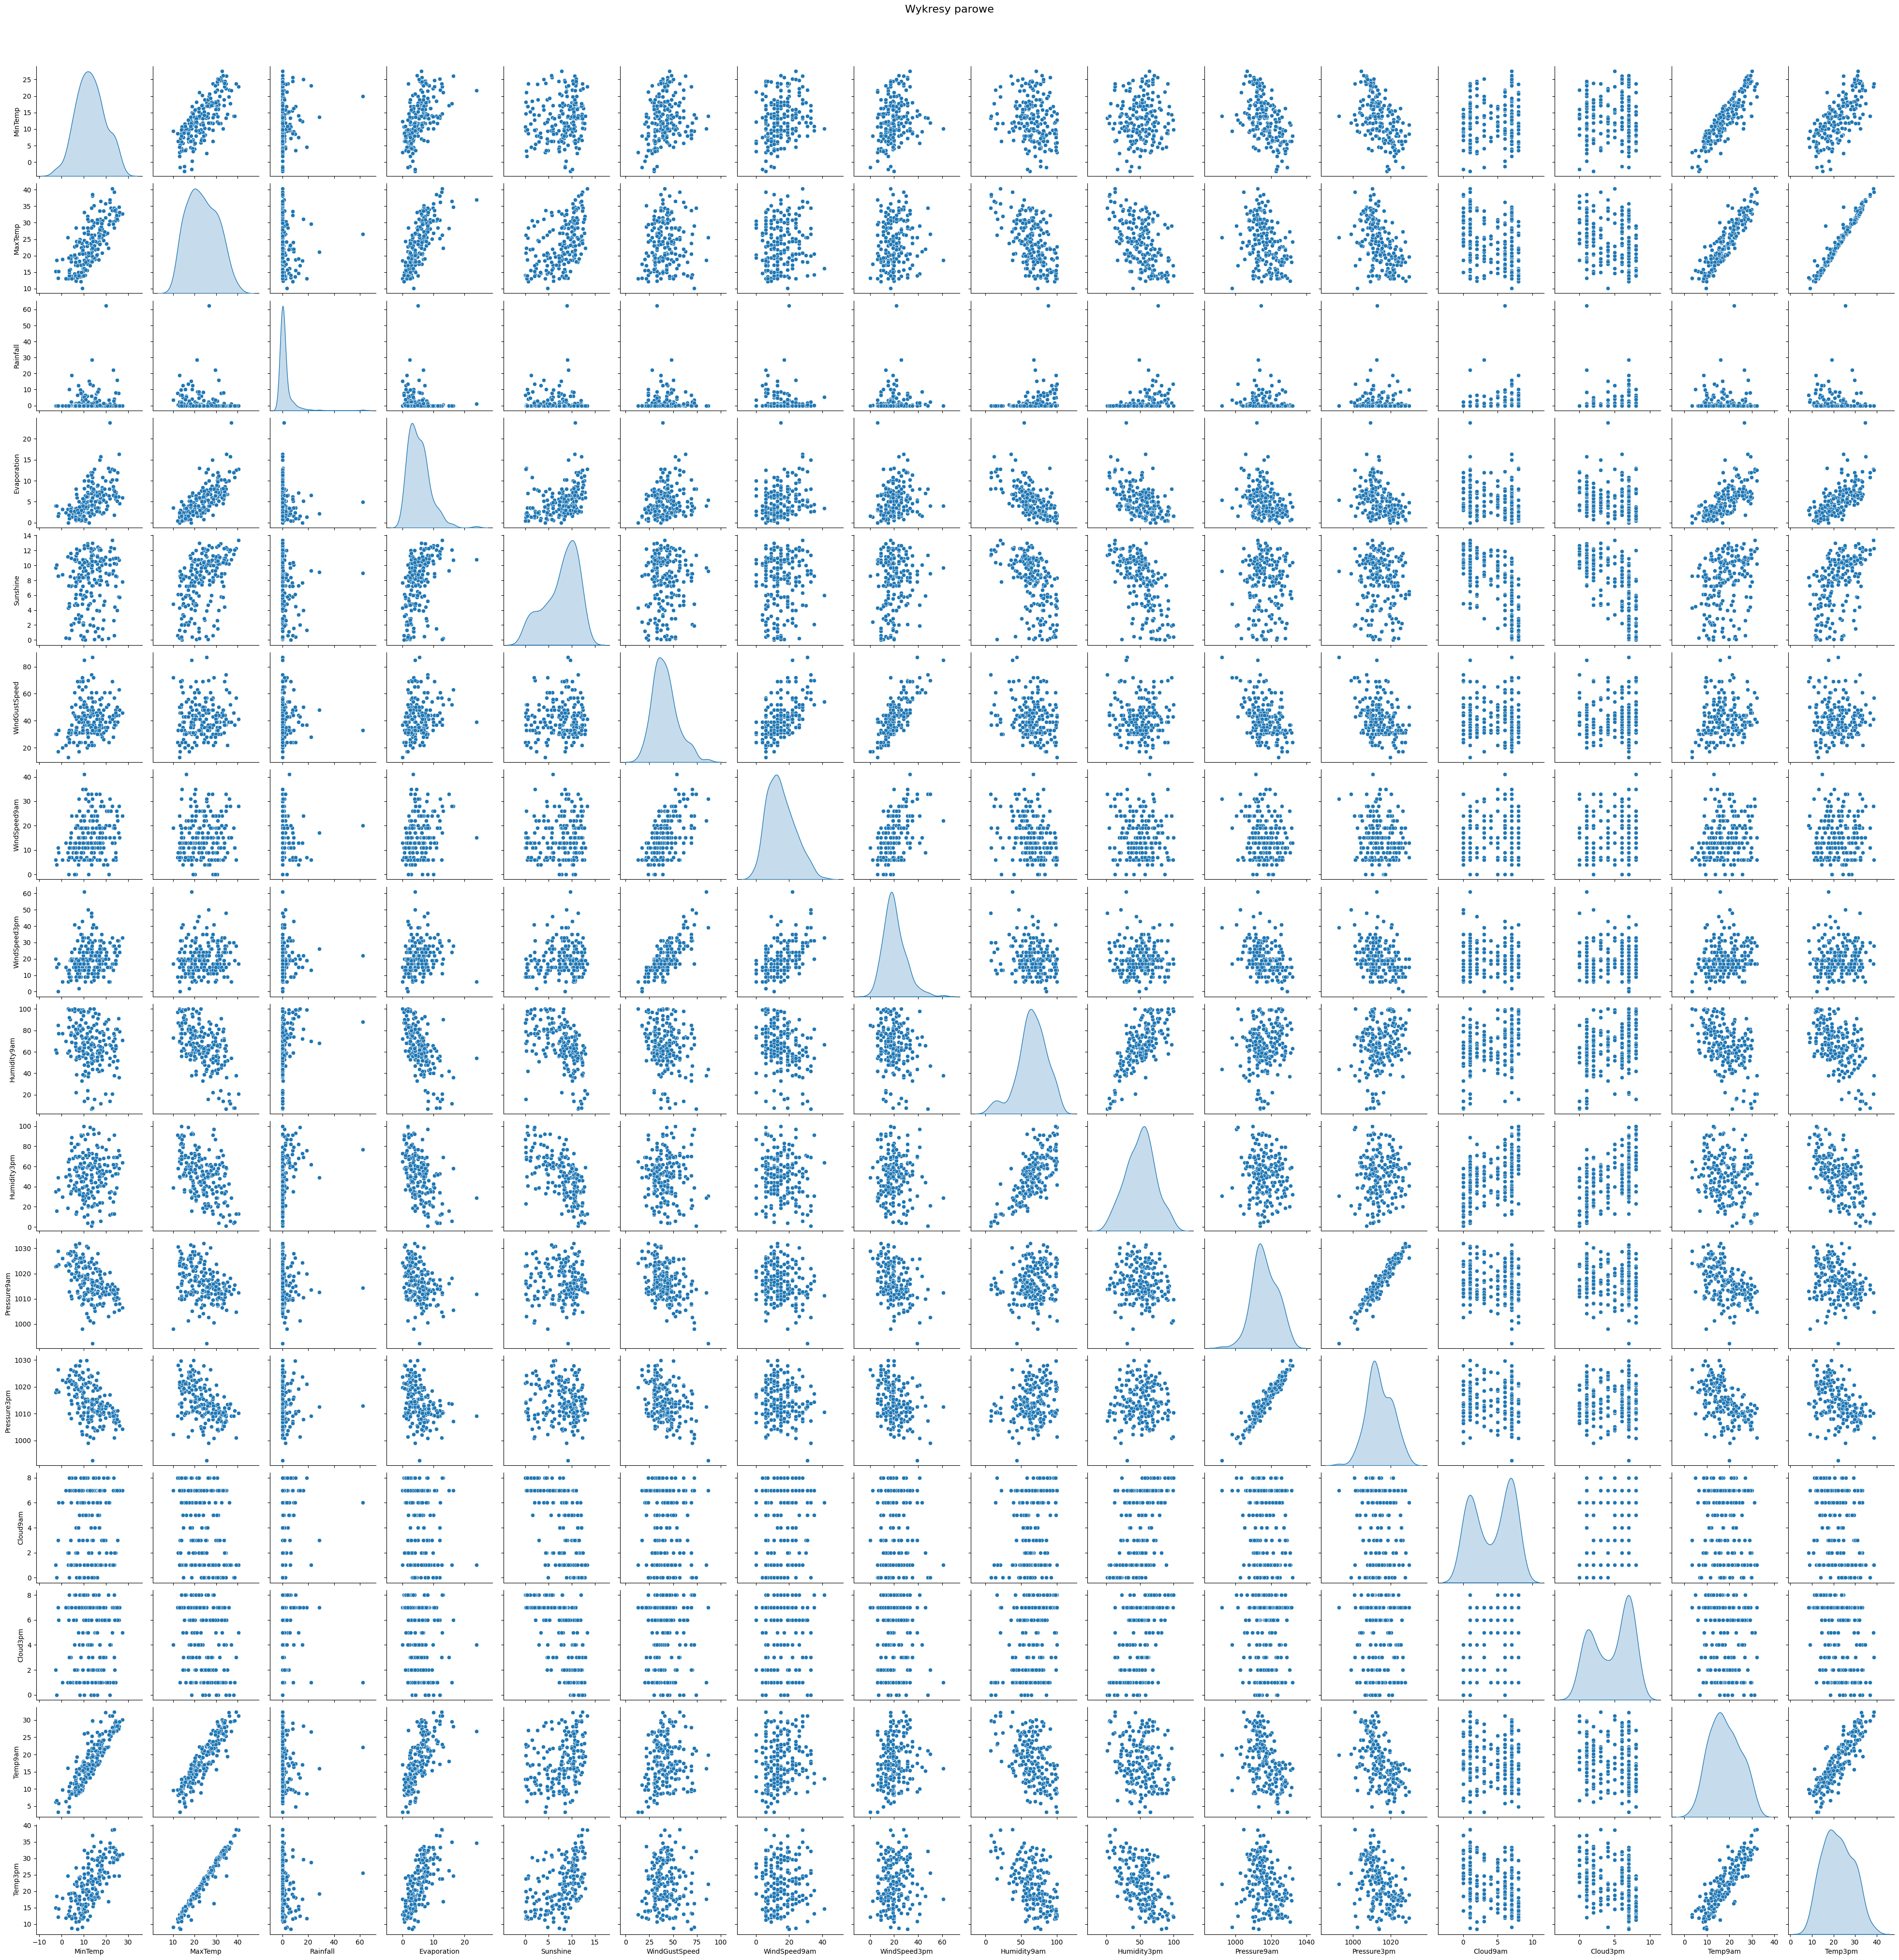

In [8]:
# Wykresy zależności (pary zmiennych liczbowych)
sample_data = data.sample(500, random_state=42) if len(data) > 500 else data
sns.pairplot(sample_data[numeric_cols].dropna(), diag_kind="kde")
plt.suptitle("Wykresy parowe", y=1.02, fontsize=16)
plt.show()

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Wczytaj dane
data = pd.read_csv("weatherAUS.csv")

# Sprawdzenie brakujących wartości
print("Brakujące wartości przed imputacją:")
print(data.isnull().sum())

# Wybór zmiennych liczbowych do imputacji
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Tworzenie modelu SimpleImputer z użyciem średniej
imputer = SimpleImputer(strategy='mean')

# Dopasowanie i transformacja zmiennych liczbowych
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Sprawdzenie braków po imputacji
print("\nBrakujące wartości po imputacji (zmienne liczbowe):")
print(data.isnull().sum())


ModuleNotFoundError: No module named 'sklearn'